### Binary Classification with MNIST Dataset and Keras
This script sets up a simple linear classifier to classify digits from the classic MNIST dataset.

In [82]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np

Use a Keras utility function to load the MNIST dataset.  We select only zeros and ones to do binary classification.

In [95]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# select only zeros and ones
x_train = x_train[y_train<2]
y_train = y_train[y_train<2]
x_test = x_test[y_test<2]
y_test = y_test[y_test<2]

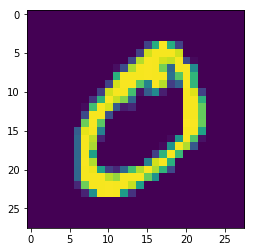

In [96]:
plt.imshow(x_train[0])
plt.show()

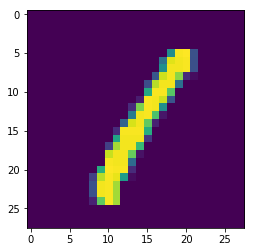

In [97]:
plt.imshow(x_train[1])
plt.show()

Resize the images to vectors and convert their datatype and range.

In [98]:
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a binary linear classifier model.

In [99]:
x_in = Input((784,))
x_out = Dense(1,activation='sigmoid')(x_in)
model = Model(inputs=x_in,outputs=x_out)

Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [100]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

Optimize the model over the training data.

In [101]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 12665 samples, validate on 2115 samples
Epoch 1/20
12665/12665 [==============================] - 0s - loss: 0.2332 - acc: 0.9667 - val_loss: 0.0929 - val_acc: 0.9986
Epoch 2/20
12665/12665 [==============================] - 0s - loss: 0.0750 - acc: 0.9964 - val_loss: 0.0520 - val_acc: 0.9986
Epoch 3/20
12665/12665 [==============================] - 0s - loss: 0.0500 - acc: 0.9965 - val_loss: 0.0373 - val_acc: 0.9986
Epoch 4/20
12665/12665 [==============================] - 0s - loss: 0.0389 - acc: 0.9969 - val_loss: 0.0295 - val_acc: 0.9986
Epoch 5/20
12665/12665 [==============================] - 0s - loss: 0.0326 - acc: 0.9972 - val_loss: 0.0247 - val_acc: 0.9986
Epoch 6/20
12665/12665 [==============================] - 0s - loss: 0.0284 - acc: 0.9972 - val_loss: 0.0214 - val_acc: 0.9986
Epoch 7/20
12665/12665 [==============================] - 0s - loss: 0.0254 - acc: 0.9972 - val_loss: 0.0190 - val_acc: 0.9986
Epoch 8/20
12665/12665 [==============================] - 0s -

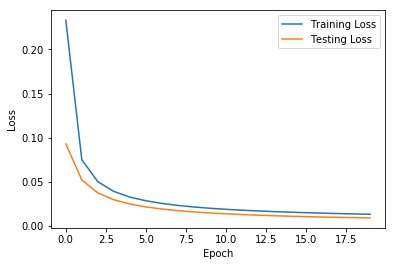

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

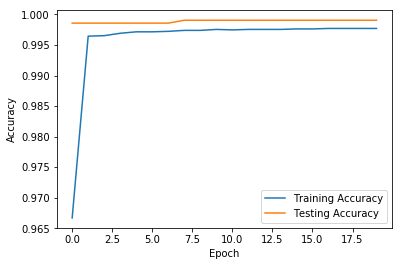

In [103]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Show the filter that was learned.

In [104]:
filt = np.reshape(model.get_weights()[0],(28,28))
bias = model.get_weights()[1]

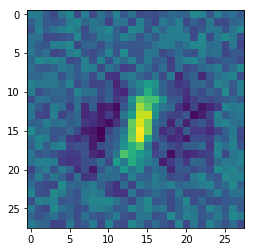

In [105]:
plt.imshow(filt)
plt.show()